In [3]:
using Pkg
Pkg.add("QuadGK")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [41]:
using QuadGK
using Polynomials

<a href="https://www.icsr.agh.edu.pl/~mownit/pdf/06_kwadratury.pdf"> Wykład </a>

Kwadratury Gaussa bazują na tzw. odciętych punktów Gaussa $x_{i}$ oraz współczynnikach $a_{i}$


In [5]:
# funkcja obliczająca odcięte punktów Gaussa oraz ich współczynniki 
(xp,a)=gauss(Float64,7)


([-0.949108, -0.741531, -0.405845, 0.0, 0.405845, 0.741531, 0.949108], [0.129485, 0.279705, 0.38183, 0.417959, 0.38183, 0.279705, 0.129485])

Podstawowe użycie w/w danych: 
aby policzyć $\int_{-1}^{1} f dx$  używamy odciętych punktów wraz z wagami wg wzoru 
$\sum_{i=1}^{n}{a_{i}f(x_{i})}$


In [6]:
f(x)=x^2
sum(a .* f.(xp)) 

0.6666666666666669

In [7]:
Poly([1, 2]) * 4

Poly(4 + 8*x)

### Zadanie 1
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplentuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

In [8]:
function legendrePoly(n)
    
    p0 = Poly([1.])
    p1 = Poly([0., 1.])
    
    if n == 0
        return p0
        
    else
        for k = 1:(n - 1)
            p2 = ((Poly([0., (2 * k + 1.)]) * p1) - (k * p0)) / (k + 1.)
            p0 = p1
            p1 = p2
        end
        return p1
    end
end

legendrePoly (generic function with 1 method)

In [9]:
using Plots
using Roots

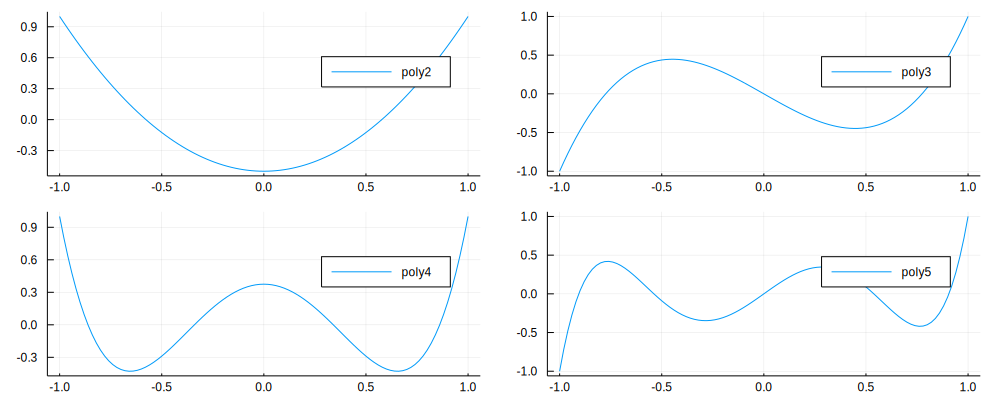

In [10]:
x = -1.:0.02:1.
y = legendrePoly(2)(x)
p2 = plot(x, y, label="poly2")
y = legendrePoly(3)(x)
p3 = plot(x, y, label="poly3")
y = legendrePoly(4)(x)
p4 = plot(x, y, label="poly4")
y = legendrePoly(5)(x)
p5 = plot(x, y, label="poly5")
plot(p2, p3, p4, p5, layout=(2, 2), size=(1000, 400))

In [95]:
for i = 2:4
    println("degree: ", i)
    r = find_zeros(legendrePoly(i), -1., 1.)
    println("found roots: ", r)
    xp, a = gauss(Float64, i)
    println("gauss result: ", xp)
end

degree: 2
found roots: [-0.57735, 0.57735]
gauss result: [-0.57735, 0.57735]
degree: 3
found roots: [-0.774597, 0.0, 0.774597]
gauss result: [-0.774597, 0.0, 0.774597]
degree: 4
found roots: [-0.861136, -0.339981, 0.339981, 0.861136]
gauss result: [-0.861136, -0.339981, 0.339981, 0.861136]


# TODO: zwiazek z twierdzeniem

### Zadanie 2
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

In [18]:
function integrate(f, k)
    x, weights = gauss(Float64, k)
    sum(weights .* f.(x))  
end

integrate (generic function with 1 method)

In [97]:
integrate(x -> x*x, 6)

0.6666666666666669

# TODO: test dla kolejnych stopni, test dokladnosci, zwiazek z twierdzeniem

### Zadanie 3
 
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


In [98]:
function integrate2(f, k, a, b)
    normalized = x -> f((a + b)/2. + x * ((b - a)/2.))
    return ((b - a)/2.) * integrate(normalized, k)
end

integrate2 (generic function with 1 method)

In [99]:
integrate2(x -> x*x, 3, 0.5, 3)

8.95833333333333

# TODO: test na kilku przykładach

### Zadanie 4
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności
 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

Poly(1.0 - 2.0*x + 3.0*x^2 - 1.0*x^3 + 3.0*x^5)

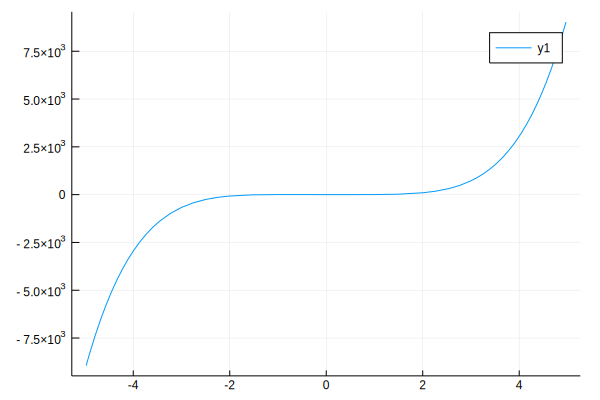

In [134]:
poly = Poly([1., -2., 3., -1., 0, 3])
a = -4.
b = 4.
print(poly)
plot(x -> poly(x), a - 1., b + 1.)

In [135]:
pint = polyint(poly)
print("exact integral value: ", pint(b) - pint(a))

exact integral value: 136.0

In [105]:
print("quadgk (result, error bound): ", quadgk(poly, a, b))

quadgk (result, error bound): (135.99999999999932, 3.410605131648481e-13)

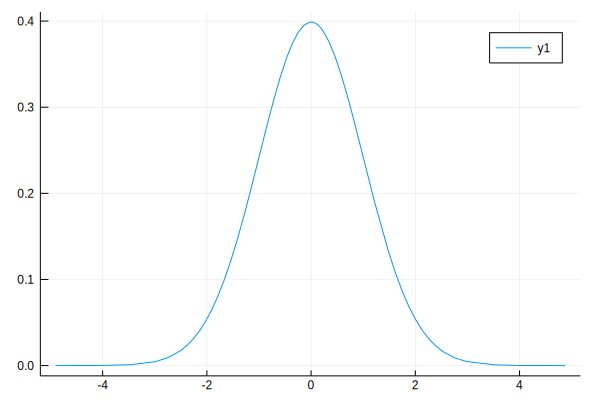

In [82]:
gaussian = x -> (1 / (sqrt(2*pi))) * exp(-(x*x)/2.)
plot(gaussian, -5, 5)

In [86]:
quadgk(gaussian, -Inf, Inf)

(1.0000000000032583, 1.4395584941504537e-8)

### Zadanie 5
Napisz własną funkcję całkującą metodą prostokątów albo trapezów. Narysuj wykres funkcji błędu
w stosunku do wyniku otrzymanego analitycznie 
w zaleznosci od ilosci potrzebnych przedziałów  dla przykładowego wielomianu.

In [187]:
function trapezoid(f, a, b, n)
    dx = (b - a) / n
    nodes = range(a, stop=b, length=n+1)
    areas = [(f(p[1]) + f(p[2])) * dx / 2. for p in zip(nodes[1:end-1], nodes[2:end])]
    sum(areas)
end

trapezoid (generic function with 1 method)

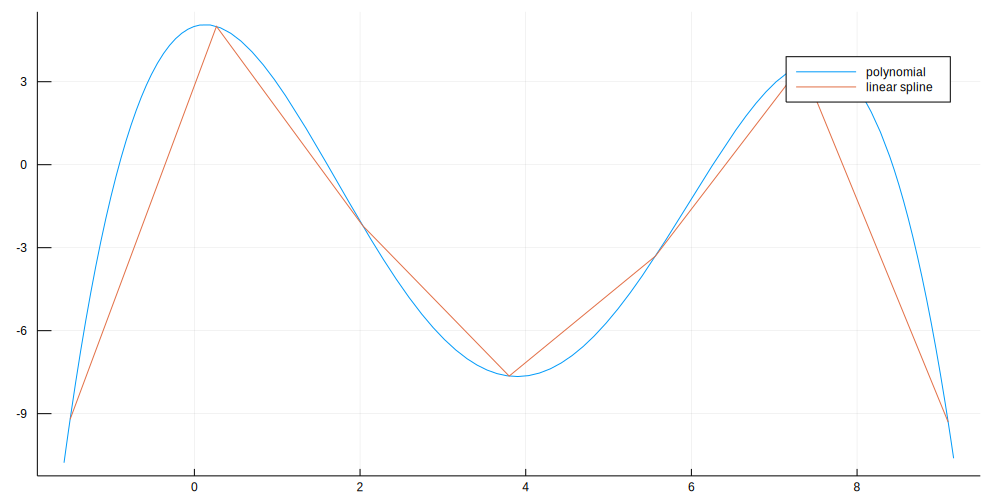

In [211]:
poly = Poly([5, 1, -4, 1, -0.065])
a = -1.5
b = 9.1
n = 6
plot(x -> poly(x), a-0.1, b+0.1, label="polynomial", size=(1000, 500))
nodes = range(a, stop=b, length=n+1)
plot!(nodes, poly(nodes), label="linear spline")

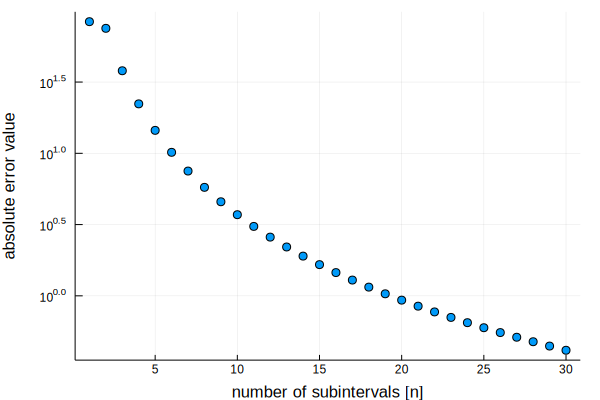

In [210]:
exact = polyint(poly)(b) - polyint(poly)(a)
tested = 1:1:30
errors = [abs(exact - trapezoid(poly, a, b, n)) for n in tested]
scatter(tested, errors,
    xlabel="number of subintervals [n]",
    ylabel="absolute error value",
    label="",
    yscale=:log10)